# Project-4 Abalone Case Study Data Analysis

## Problem Statement:

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

#### Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

In [271]:
# Lets  start with importing necessary libraries

import pandas as pd
import numpy as np


from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 


import warnings
warnings.filterwarnings('ignore')

# Examine Data

In [272]:
# Import the data as a pandas DataFrame & check 10 data set
data =pd.read_csv("abalone.csv") 
data.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [273]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

### About the column 

Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years. 


## EDA

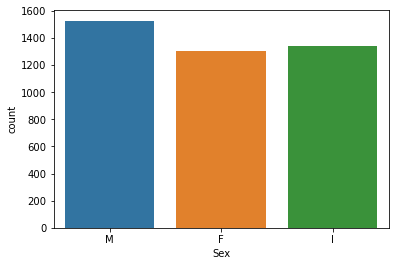

In [274]:
#plot each Sex frequency 

sns.countplot(x='Sex',data=data)
plt.show()

In [276]:
# Want to know count in sex column

data.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

## Ordinal Encoding use

In [277]:
from sklearn.preprocessing import OrdinalEncoder

In [278]:
ord_enc=OrdinalEncoder(categories=[['I','M','F']])
df1=ord_enc.fit_transform(data[['Sex']])
df1

array([[1.],
       [1.],
       [2.],
       ...,
       [1.],
       [2.],
       [1.]])

In [279]:
data['Sex']=df1
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,2.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [280]:
X =data.drop(columns=['Rings'])
y=np.where(data['Rings']>10,1,0)

In [281]:
y

array([1, 0, 0, ..., 0, 0, 1])

In [282]:
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,2.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


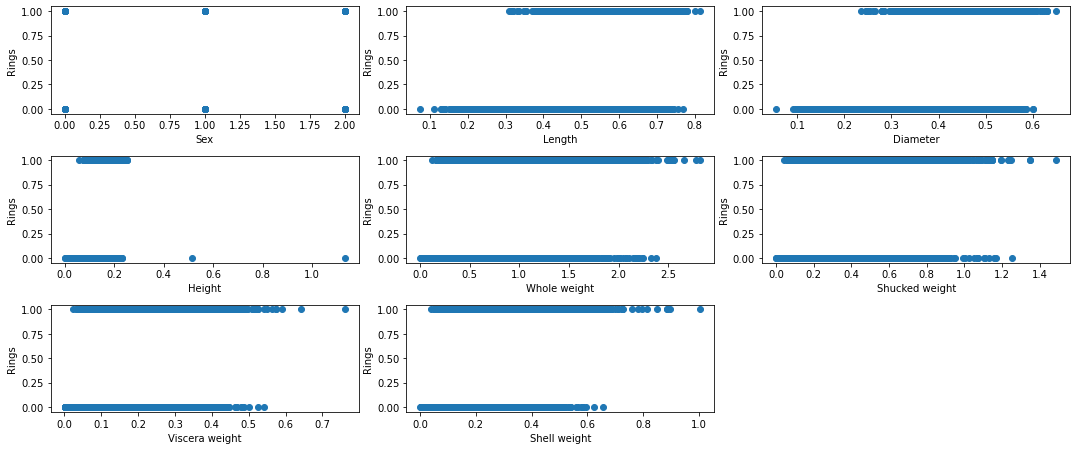

In [283]:
# Visualizing relationship

plt.figure(figsize=(15,8),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=12:
        ax= plt.subplot(4,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Rings',fontsize=10)      
        
    plotnumber+=1
plt.tight_layout()

 we can see all the columns equally distributed in the range respective range 

## Correlation- 

checking the problem of multicolinarity in our data set 

In [284]:
# Correlation

data.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,0.503697,0.516450,0.477850,0.501511,0.459731,0.505693,0.499103,0.401445
Length,0.503697,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.516450,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.477850,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.501511,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.459731,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.505693,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.499103,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.401445,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


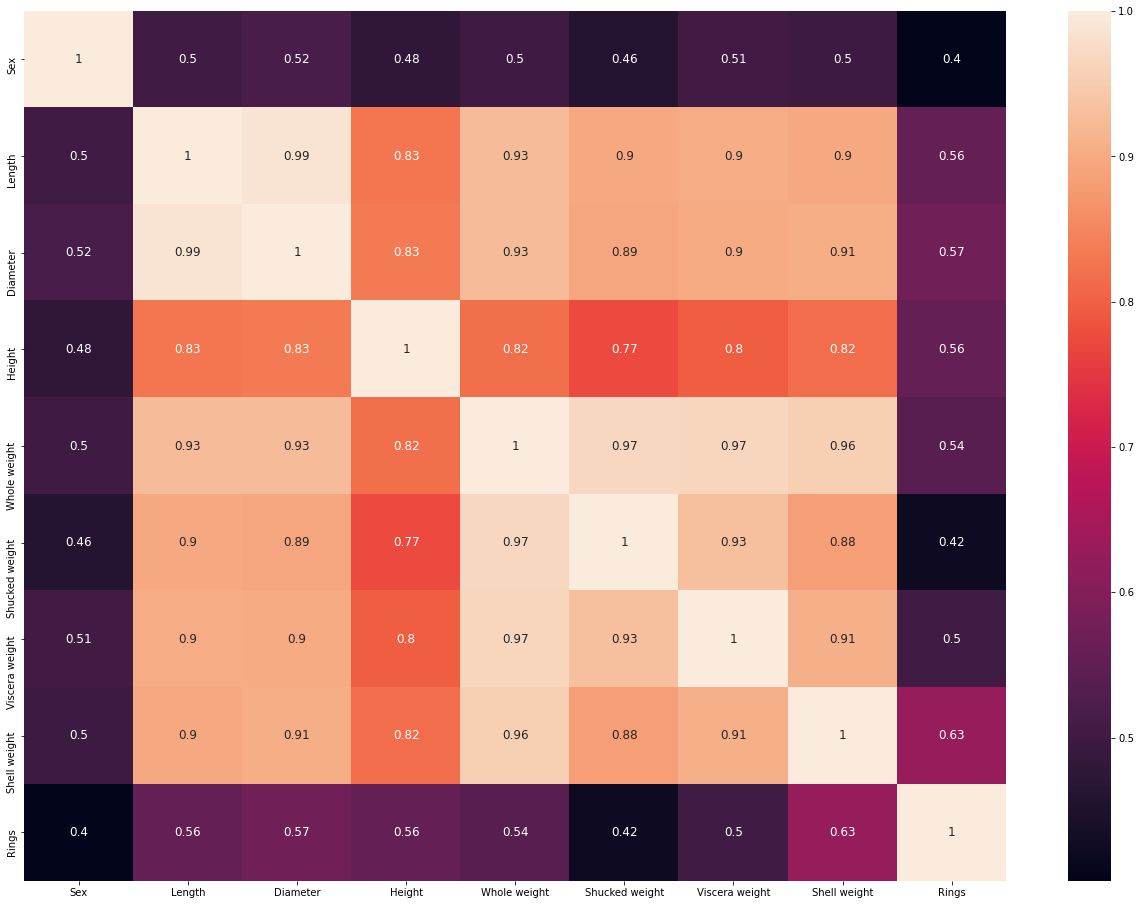

In [285]:
# this code will get the coefficient of one variable vs all other variable (relationship)


plt.figure(figsize=(22,16))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':12}) 
plt.show()


# The value lies between -1 to 1 (-1 Negatively correlation ) & (+1 Positively correlation )

## Outcome of Correlation 

All the columns of the datasets is postively & negatively correlated with the target column

fixed has 40 percent correlation with target column which can be considered as strong bond, Length
has 57 percent correlation with target column which can be considered as strong bond,Diameter has 57 percent correlation with target column which can be considered as strong bond,height has 56 percent correlation with target column which can be considered as stronh bond,Whole weight has 54 percent correlation with target column which can be considered as strong bond, Shucked weight has 42 percent correlation with target column which can be considered as strong bond, Viscera weight has 50 percent correlation with target column which can be considered as strong bond, Shell weight has 63 percent correlation with target column which can be considered as strong bond

Max correlation: Shell weight

Mini correlation: Sex



# Describing Datasets:

In [286]:
#dataframe statistics for each colimn in given datset 
#(mean, minimum and maximum value for each column containing numerical data)
data.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.991621,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.796410,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


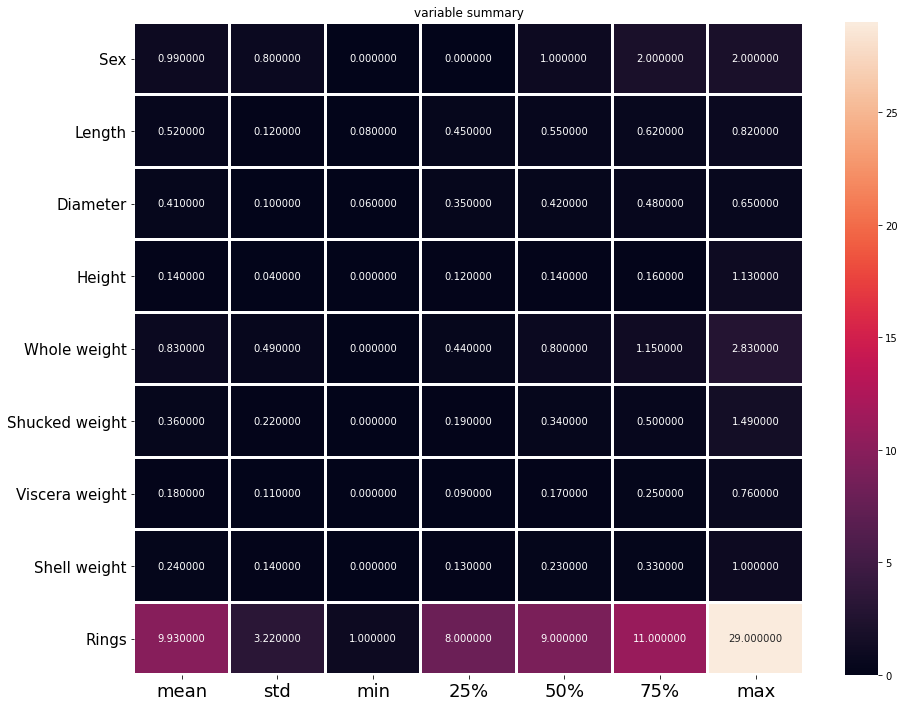

In [287]:
plt.figure(figsize=(15,12))
sns.heatmap(round(data.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f") 
plt.xticks(fontsize=18)
plt.yticks(fontsize=15)
plt.title("variable summary")
plt.show()

## outcome of describe of dataset 

Fromthe shows plotting we are determining mean,standard deviation, minimum and maximum value of each colun it helps us further in data cleaning 

Total Number of rows in the datasets:
     4177 rows
     9 columns

Sex - 
    1.Mean=0.99
    2.Std=0.79
    3.min_value=0.00
    4.max_value=2.00
    
Length -
    1.Mean=0.52
    2.Std=0.12
    3.min_value=0.07
    4.max_value=0.81
    
Diameter -
    1.Mean=0.40
    2.Std=0.09
    3.min_value=0.05
    4.max_value=0.65

Height -
    1.Mean=0.13
    2.Std=0.04
    3.min_value=0.00
    4.max_value=1.13

Whole weight-
    1.Mean=0.82
    2.Std=0.49
    3.min_value=0.00
    4.max_value=2.82

Shucked weight-
    1.Mean=0.35
    2.Std=0.22
    3.min_value=0.00
    4.max_value=1.48

Viscera weight-
    1.Mean=0.18
    2.Std=0.10
    3.min_value=0.00
    4.max_value=0.76

Shell weight-
   1.Mean=0.23
    2.Std=0.13
    3.min_value=0.00
    4.max_value=1.00
    
Rings-
   1.Mean=9.93
    2.Std=3.22
    3.min_value=1.00
    4.max_value=29.0    


In [288]:
#print summary (number of obseravation and data type for each column in give data set)
print('Shape         ------>',data.shape)
print('Each column and data type and its count','\n')
print(data.info())

Shape         ------> (4177, 9)
Each column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   float64
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 293.8 KB
None


In [289]:
# check null value in our dataset 
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Seems on other cols have nulls. its safe to proced 

In [290]:
# Check duplicate value in given datset 
data.duplicated().sum()

0

there is no duplicate in data set so good to proceed

# Outlier checking 

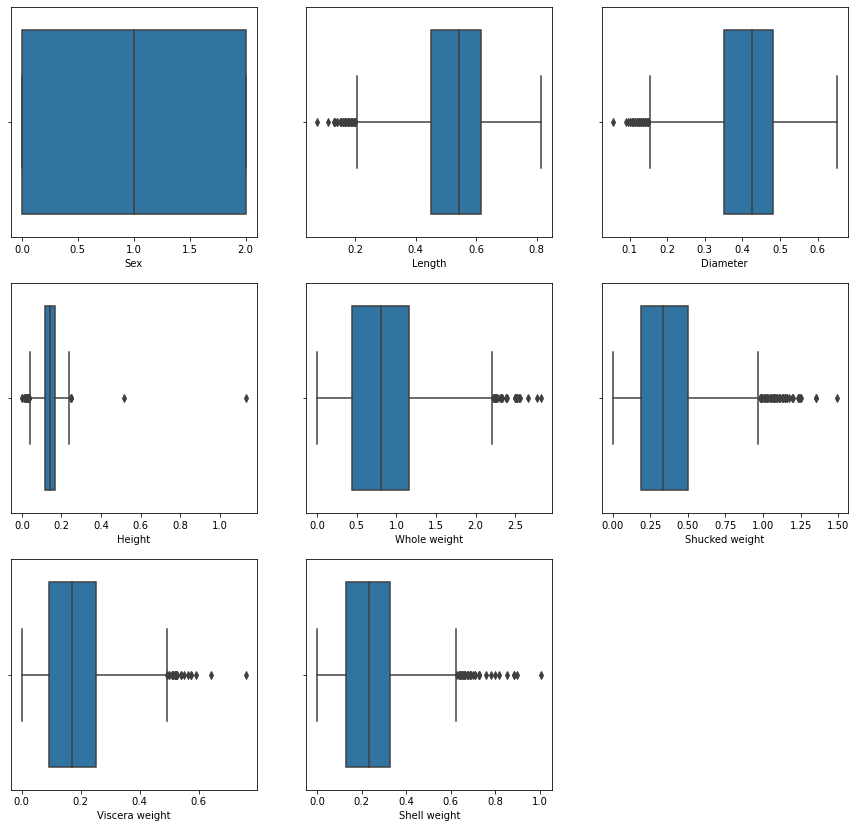

In [291]:
# let's see how data is distributed for every column

plt.figure(figsize=(15,50))

graph=1

for column in X:
    if plotnumber<=30:  
        ax= plt.subplot(10,3,graph)
        sns.boxplot(X[column],orient='v')
        plt.xlabel(column,fontsize=10)
        graph+=1
plt.show()

### Outcome of box plot 


columns['Length','Diameter','Height','Whole weight ','Shucked weight','Viscera weight ','Shell weight'] has more outliers


## Skewness

In [292]:
data.skew()

Sex               0.014980
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

### Outcome of skewness 

skewness threshold is taken is +/-0.5. columns which are having skewness:

Length

Diameter  

Height

Whole weight

Shucked weight 

Viscera weight 

Shell weight     

## Normal distribution Curve

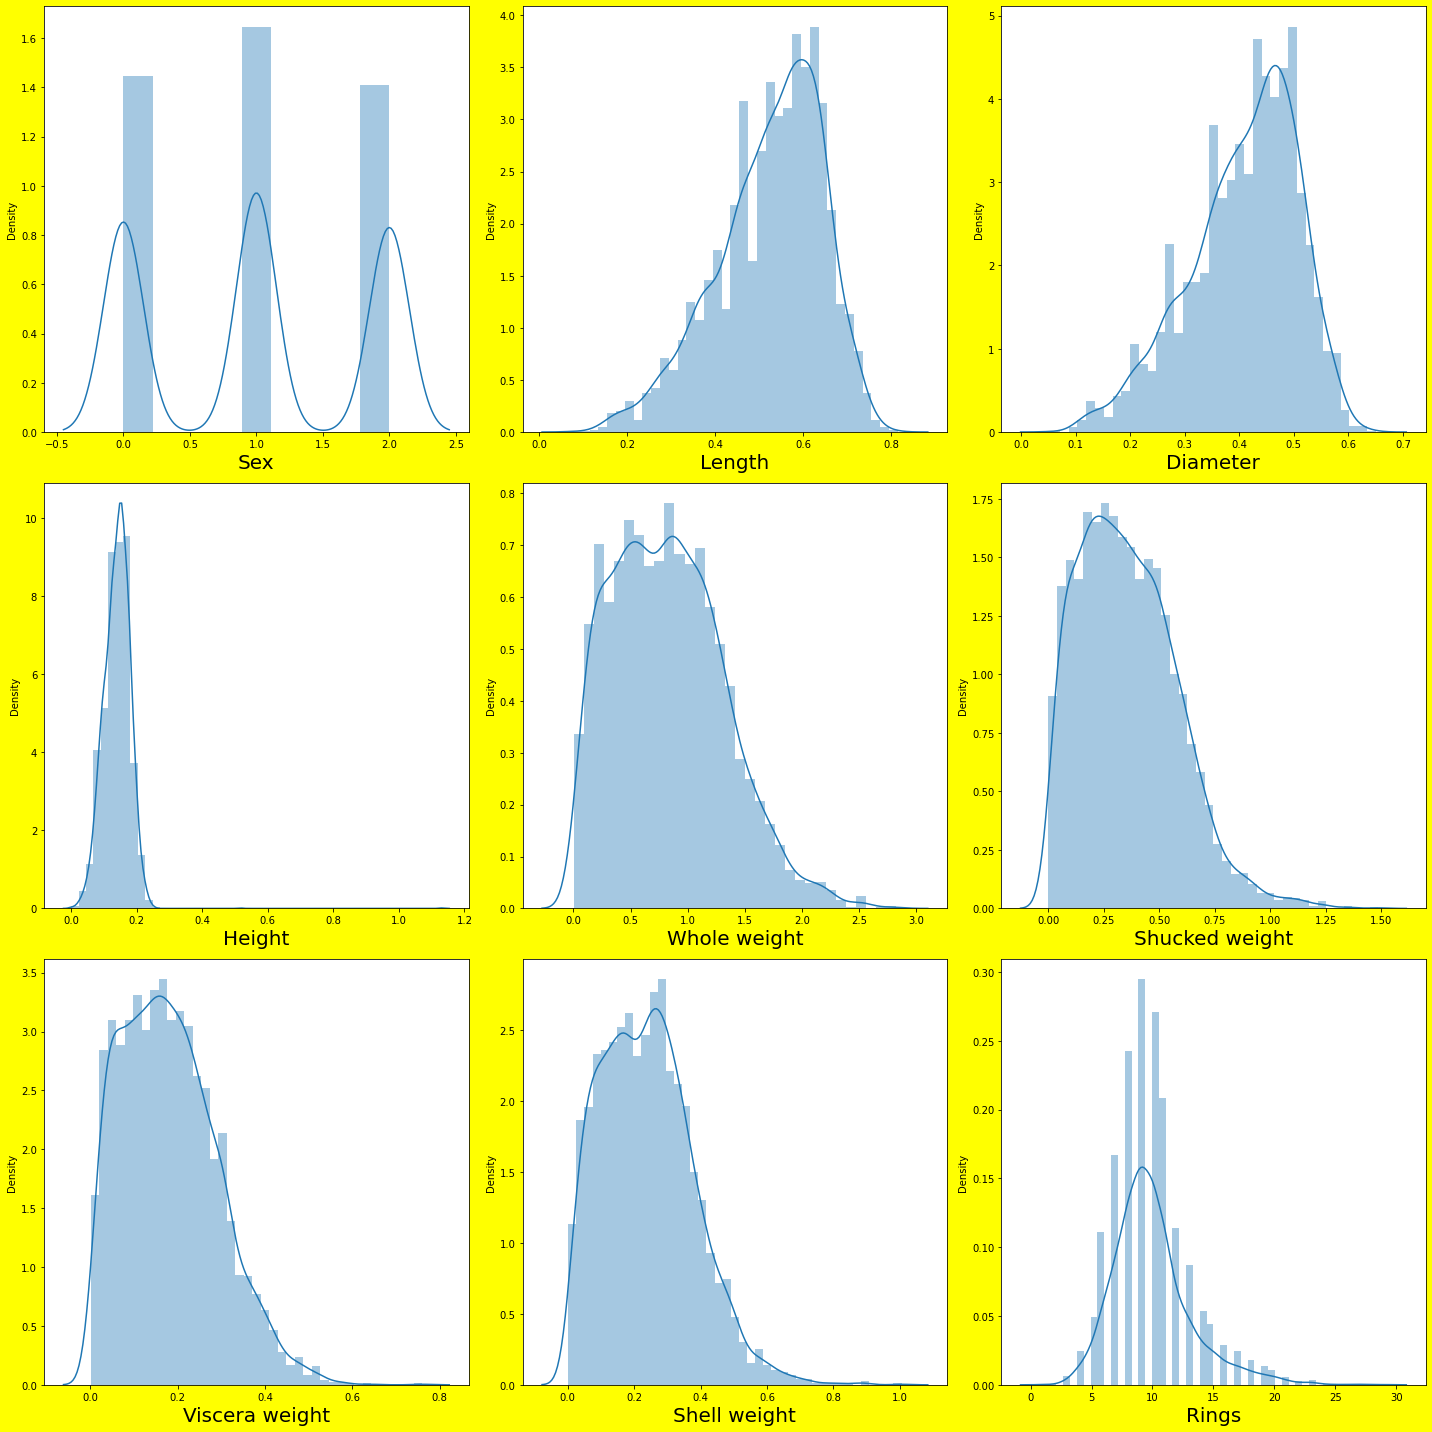

In [293]:
# let's see how data is distributed for every column

plt.figure(figsize=(20,20),facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=9:  #as there are 9 columns in the data 
        ax= plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
        
    plotnumber+=1
plt.tight_layout()

Above distribution shows data is not distrbuted normally. & its shows that the data is skewed

## Data cleaning & removing the outlier 

In [294]:
## stats available in stats

from scipy.stats import zscore 

# supply all the column which is having in outlier 

z_score=zscore(data[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']]) #  dont apply on catogorical data 
abs_z_score =np.abs(z_score) #apply the formula and get the scaled data


filtering_entry =(abs_z_score<3).all(axis=1)

data=data[filtering_entry]

data.reset_index()

data.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000
mean,0.988247,0.522090,0.406308,0.138530,0.808404,0.350172,0.176579,0.233142,9.901567
std,0.798209,0.115709,0.095848,0.037001,0.457321,0.205827,0.103336,0.129482,3.164617
min,0.000000,0.165000,0.115000,0.015000,0.014500,0.005500,0.000500,0.005000,3.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441000,0.185375,0.092875,0.130000,8.000000
50%,1.000000,0.540000,0.420000,0.140000,0.790750,0.332000,0.168500,0.230000,9.000000
75%,2.000000,0.610000,0.480000,0.165000,1.134750,0.494000,0.247000,0.320500,11.000000
max,2.000000,0.760000,0.605000,0.250000,2.238500,1.017000,0.492500,0.655000,29.000000


## Percentage data loss

In [295]:
## percentage data loss

loss_percent =(4177-4084)/4084*100
print(loss_percent)

2.277179236043095


In [296]:
data.skew()

Sex               0.021071
Length           -0.633786
Diameter         -0.605450
Height           -0.247192
Whole weight      0.323886
Shucked weight    0.449573
Viscera weight    0.429932
Shell weight      0.358512
Rings             1.136367
dtype: float64

In [297]:
## Drop sex Column its having less correlation 

## Transforming data to remove the skewness

In [298]:
from sklearn.preprocessing import power_transform
X=power_transform(X,method='yeo-johnson')

In [299]:
X

array([[ 0.09501059, -0.68550213, -0.54986033, ..., -0.54098937,
        -0.69328289, -0.587809  ],
       [ 0.09501059, -1.39634403, -1.38733299, ..., -1.31166208,
        -1.33295268, -1.33241968],
       [ 1.21429657, -0.07077438,  0.00853714, ..., -0.36611642,
        -0.25513514, -0.09826193],
       ...,
       [ 0.09501059,  0.59336612,  0.64519089, ...,  0.83813658,
         1.01560749,  0.59839786],
       [ 1.21429657,  0.85337516,  0.76992788, ...,  0.85873857,
         0.81518436,  0.51914542],
       [ 0.09501059,  1.83447784,  1.72628889, ...,  2.10364827,
         1.61134422,  1.65848824]])

In [300]:
scaler = StandardScaler()

X= scaler.fit_transform(X)

In [301]:
X

array([[ 0.09501059, -0.68550213, -0.54986033, ..., -0.54098937,
        -0.69328289, -0.587809  ],
       [ 0.09501059, -1.39634403, -1.38733299, ..., -1.31166208,
        -1.33295268, -1.33241968],
       [ 1.21429657, -0.07077438,  0.00853714, ..., -0.36611642,
        -0.25513514, -0.09826193],
       ...,
       [ 0.09501059,  0.59336612,  0.64519089, ...,  0.83813658,
         1.01560749,  0.59839786],
       [ 1.21429657,  0.85337516,  0.76992788, ...,  0.85873857,
         0.81518436,  0.51914542],
       [ 0.09501059,  1.83447784,  1.72628889, ...,  2.10364827,
         1.61134422,  1.65848824]])

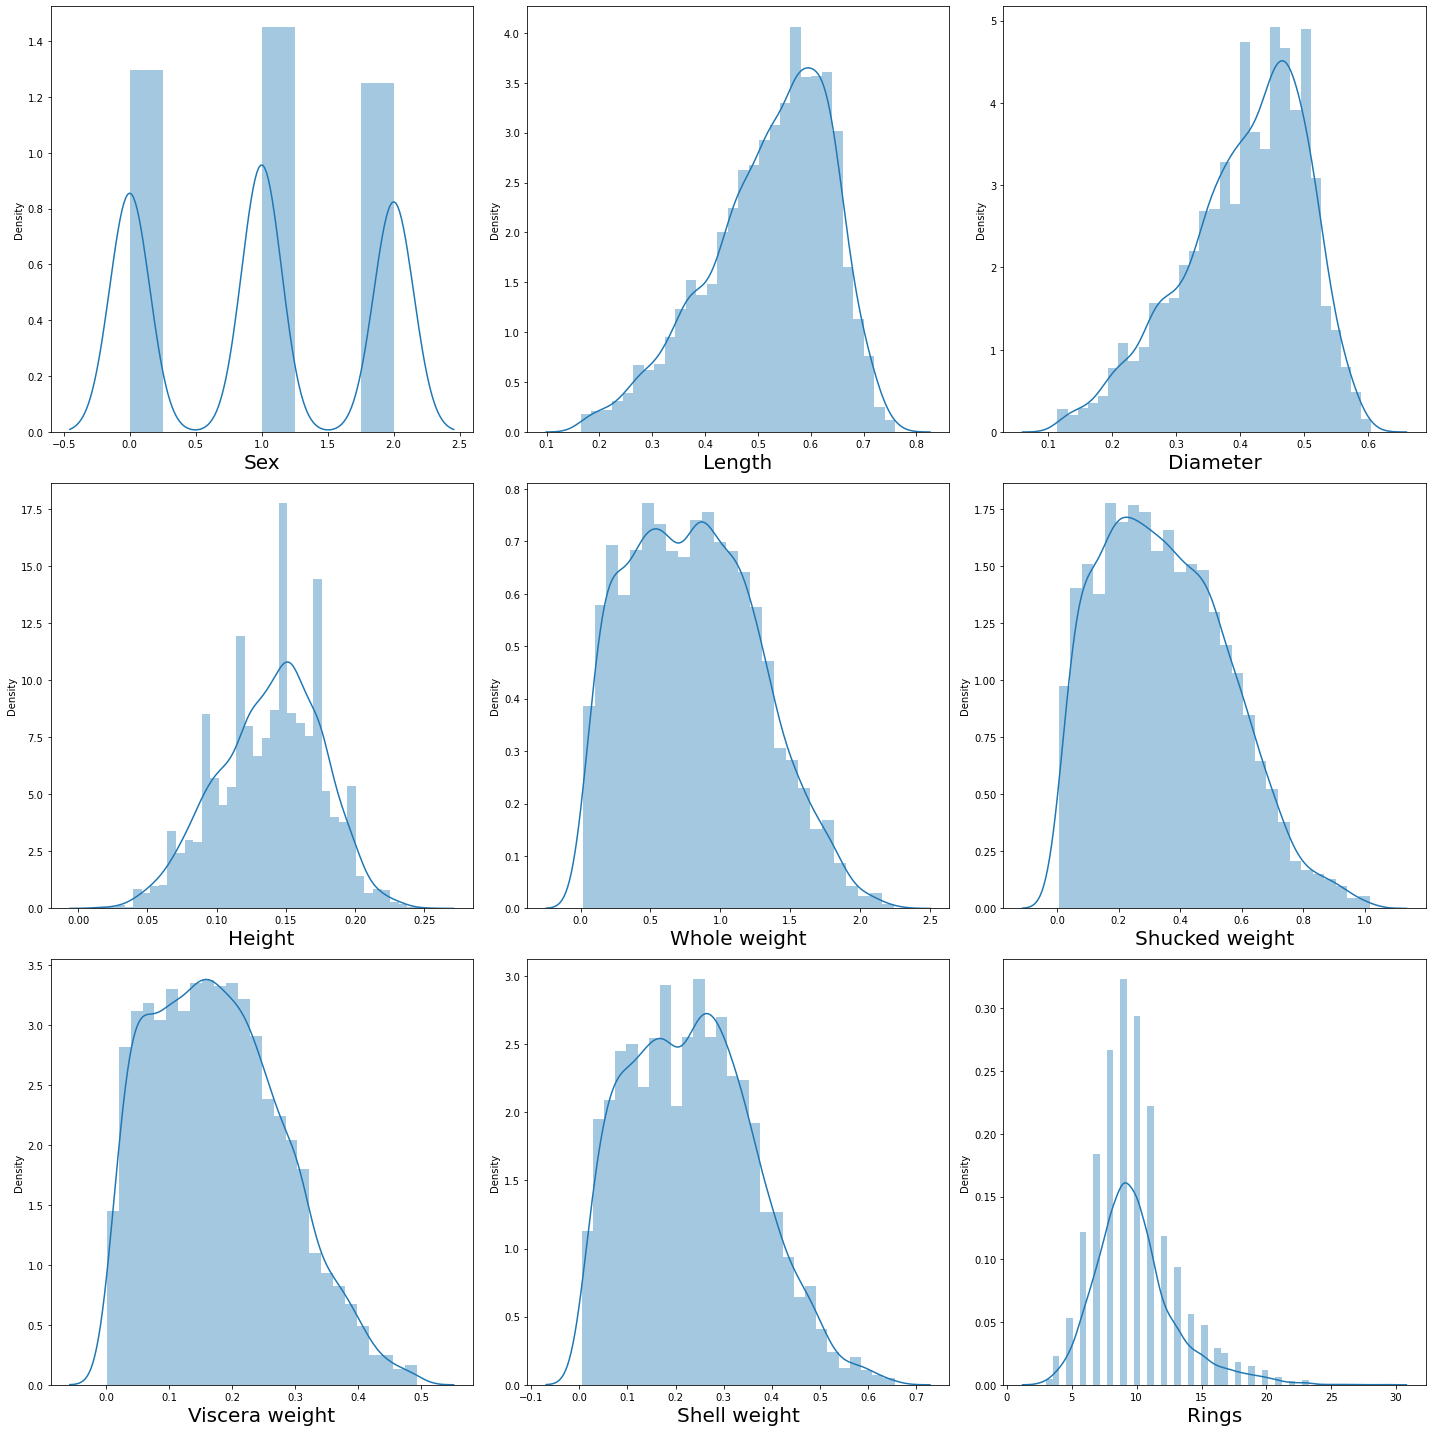

In [302]:
# let's see how data is distributed for every column

plt.figure(figsize=(20,20))
plotnumber=1

for column in data:
    if plotnumber<=9:  #as there are 9 columns in the data 
        ax= plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
        
    plotnumber+=1
plt.tight_layout()

The data looks much better now than before. We will start our analysis with this data now as we don't want to lose important information. If our model doesn't work with accuracy, we will come back for more preprocessing.

In [303]:
# Checking label data set 
y

array([1, 0, 0, ..., 0, 0, 1])

In [304]:
# checking Features data set 
X

array([[ 0.09501059, -0.68550213, -0.54986033, ..., -0.54098937,
        -0.69328289, -0.587809  ],
       [ 0.09501059, -1.39634403, -1.38733299, ..., -1.31166208,
        -1.33295268, -1.33241968],
       [ 1.21429657, -0.07077438,  0.00853714, ..., -0.36611642,
        -0.25513514, -0.09826193],
       ...,
       [ 0.09501059,  0.59336612,  0.64519089, ...,  0.83813658,
         1.01560749,  0.59839786],
       [ 1.21429657,  0.85337516,  0.76992788, ...,  0.85873857,
         0.81518436,  0.51914542],
       [ 0.09501059,  1.83447784,  1.72628889, ...,  2.10364827,
         1.61134422,  1.65848824]])

## Splitting the dataFrame 

In [305]:
# Building model to test unexposed data

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)



In [306]:
from sklearn.metrics import plot_roc_curve

# Defining function predict training and testing result 

In [307]:
def print_score(clf,x_train,x_test,y_train,y_test, train=True): # Classifier-?? i dont which classifier pass
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n=============Train Result=========================")
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train == False:
        pred =clf.predict(x_test)
        
        print("\n=============Test Result=========================")
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%")
        print ('\n \n  Test Classification Report \n', classification_report(y_test,pred,digits=2))

## Classification Methods

## Model instantiating and training

In [308]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

print_score(lr,x_train,x_test,y_train,y_test, train=True)

print_score (lr,x_train,x_test,y_train,y_test, train=False)


=============Train Result=========================
Accuracy Score: 79.02%

=============Test Result=========================
Accuracy Score: 78.46%

 
  Test Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       923
           1       0.70      0.61      0.65       456

    accuracy                           0.78      1379
   macro avg       0.76      0.74      0.75      1379
weighted avg       0.78      0.78      0.78      1379



In [309]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print_score(dt,x_train,x_test,y_train,y_test, train=True)

print_score (dt,x_train,x_test,y_train,y_test, train=False)


=============Train Result=========================
Accuracy Score: 100.00%

=============Test Result=========================
Accuracy Score: 74.33%

 
  Test Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       923
           1       0.61      0.64      0.62       456

    accuracy                           0.74      1379
   macro avg       0.71      0.72      0.71      1379
weighted avg       0.75      0.74      0.74      1379



In [310]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

#Random Forest Model Training and printing train and test score 

rf.fit(x_train,y_train)

print_score(rf,x_train,x_test,y_train,y_test, train=True)

print_score (rf,x_train,x_test,y_train,y_test, train=False)




=============Train Result=========================
Accuracy Score: 99.96%

=============Test Result=========================
Accuracy Score: 77.81%

 
  Test Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       923
           1       0.68      0.63      0.65       456

    accuracy                           0.78      1379
   macro avg       0.75      0.74      0.74      1379
weighted avg       0.77      0.78      0.78      1379



In [311]:
from sklearn.svm import SVC
svc=SVC()

#svc Model training and printing train and test score 
svc.fit(x_train,y_train)

print_score(svc,x_train,x_test,y_train,y_test, train=True)

print_score (svc,x_train,x_test,y_train,y_test, train=False)


=============Train Result=========================
Accuracy Score: 79.84%

=============Test Result=========================
Accuracy Score: 79.41%

 
  Test Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       923
           1       0.70      0.66      0.68       456

    accuracy                           0.79      1379
   macro avg       0.77      0.76      0.76      1379
weighted avg       0.79      0.79      0.79      1379



## since cross validation score,accuracy score are almost same.We are heading with a good approch

In [312]:
from sklearn.model_selection import cross_val_score 

In [313]:
scr=cross_val_score(lr,X,y,cv=5)
print('Cross valdation score of SVC Model:',scr.mean())

Cross valdation score of SVC Model: 0.7874030885597226


In [314]:
scr=cross_val_score(dt,X,y,cv=5)
print('Cross valdation score of Decision Tree Model:',scr.mean())

Cross valdation score of Decision Tree Model: 0.6978657995014756


In [315]:
scr=cross_val_score(rf,X,y,cv=5)
print('Cross valdation score of Random Forest Model:',scr.mean())

Cross valdation score of Random Forest Model: 0.7723230094834255


In [316]:
scr=cross_val_score(svc,X,y,cv=5)
print('Cross valdation score of SVC Model:',scr.mean())

Cross valdation score of SVC Model: 0.7821425092398935


logistic regression &  SVC is performing better among all so we will continue with Logistic regression & SVC 

# Hyper parameter tuning 

Let's try to increase our accuracy of models (SVC 

## Grid Search CV

In [317]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [318]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=5)

In [319]:
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [321]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.1, 'kernel': 'linear'}

In [322]:
grid_svc.best_estimator_

SVC(C=1.2, gamma=0.1, kernel='linear')

In [323]:
svc=SVC(C=1.2, gamma=0.1, kernel='linear')

#svc Model training and printing train and test score 
svc.fit(x_train,y_train)

print_score(svc,x_train,x_test,y_train,y_test, train=True)

print_score (svc,x_train,x_test,y_train,y_test, train=False)


=============Train Result=========================
Accuracy Score: 79.52%

=============Test Result=========================
Accuracy Score: 78.68%

 
  Test Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       923
           1       0.71      0.61      0.65       456

    accuracy                           0.79      1379
   macro avg       0.76      0.74      0.75      1379
weighted avg       0.78      0.79      0.78      1379



SVC improves from 77.8% to 78.68% using Grid Search CV

## we select SVC is over final model 

##  ROC AUC curve 

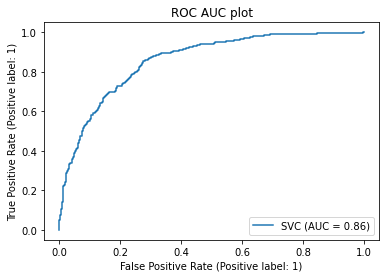

In [324]:
plot_roc_curve(grid_svc.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

## Model Saving:

In [325]:
import joblib
joblib.dump(grid_svc.best_estimator_,"Abalone.pkl")

['Abalone.pkl']

## Conclusion

SVC model is the  Best model for abalone dataset predection 

In [326]:
import numpy as np
a=np.array(y_test)
predicted =np.array(svc.predict(x_test))
df_com=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
df_com

,original,predicted
0,0,1
1,0,0
2,1,1
3,0,1
4,1,1
...,...,...
1374,0,0
1375,0,0
1376,0,0
1377,0,0


since model giving the some error